# Velocity Gradients

In [1]:
# understanding lateral strain rate

# alpha = sqrt( (u_x - v_y)**2 + (v_x + u_y)**2 )

# with special velocity gradients

import numpy 
import matplotlib.pyplot as plt

In [18]:
# Case 1: pos. u_y and pos. v_x : alpha = 2

grad_v_1 = numpy.array( [[ 0, 1 ],
                         [ 1, 0 ]] )

# Case 2: neg. u_y and pos. v_x : alpha = 0

grad_v_2 = numpy.array( [[ 0, -1 ],
                         [ 1, 0 ]] )

# Case 3: pos. u_x and pos. v_y : alpha = 0

grad_v_3 = numpy.array( [[ 1, 0 ],
                         [ 0, 1 ]] )

# Case 4: pos. u_x and neg. v_y : alpha = 2

grad_v_4 = numpy.array( [[ 1, 0 ],
                         [ 0, -1 ]] )


In [22]:
def velocity( grad, x , y ):
    """   a;sldkjf """
    
    zonal_velocity = lambda X, Y: grad[0][1]*Y + grad[0][0]*X 
    meridonal_velocity = lambda X, Y: grad[1][1]*Y + grad[1][0]*X 
    
    return zonal_velocity(x, y), meridonal_velocity(x, y)


In [23]:
x = numpy.linspace(-10, 10, 10)
y = numpy.linspace(-10, 10, 10)

u = numpy.empty( (x.shape[0], y.shape[0]) )
v = numpy.empty( (x.shape[0], y.shape[0]) )

u1 = u.copy()
u2 = u.copy()
u3 = u.copy()
u4 = u.copy()

v1 = v.copy()
v2 = v.copy()
v3 = v.copy()
v4 = v.copy()

for i, x_val in enumerate(x):
    
    for j, y_val in enumerate(y):         
        
        u1[j][i], v1[j][i] = velocity(grad_v_1, x_val, y_val)
        u2[j][i], v2[j][i] = velocity(grad_v_2, x_val, y_val)
        u3[j][i], v3[j][i] = velocity(grad_v_3, x_val, y_val)
        u4[j][i], v4[j][i] = velocity(grad_v_4, x_val, y_val)

X, Y = numpy.meshgrid(x, y)


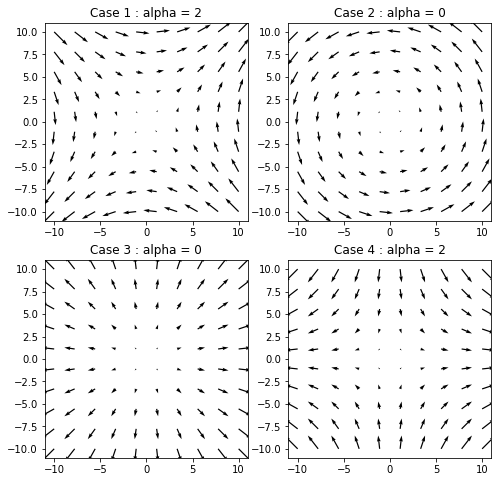

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (8, 8))

ax1.quiver(X, Y, u1, v1)
ax1.set_title( 'Case 1 : alpha = 2' )

ax2.quiver(X, Y, u2, v2)
ax2.set_title( 'Case 2 : alpha = 0' )

ax3.quiver(X, Y, u3, v3)
ax3.set_title( 'Case 3 : alpha = 0' )

ax4.quiver(X, Y, u4, v4)
ax4.set_title( 'Case 4 : alpha = 2' )

plt.show()

# Visualizing Strain Rate

$ \begin{align}
        \text{strain rate } = \frac{ \partial \epsilon}{ \partial t} = \frac{1}{L} \frac{\partial (L - L_0)}{\partial t} 
        \\
        \\
        \text{versus}
        \\
        \\
        \alpha = \sqrt{ (u_x - v_y)^2 + (v_x + u_y)^2 }
   \end{align}
$

units

picture

**Simulation 1**: 
u_x = 1 unit per sec

In [65]:
from matplotlib.animation import FuncAnimation

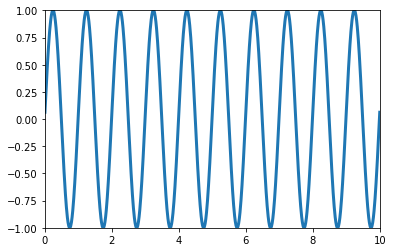

In [66]:
# create figure

fig1 = plt.figure()

axis = plt.axes(xlim =(0, 10), ylim =(-1, 1))

# initializing a line variable
line, = axis.plot([], [], lw = 3) 
   
# data which the line will 
# contain (x, y)
def init(): 
    line.set_data([], [])
    return line,
   
def animate(i):
    x = numpy.linspace(0, 10, 1000)
   
    # plots a sine graph
    y = numpy.sin(2 * numpy.pi * (x - 0.01 * i))
    line.set_data(x, y)
      
    return line,

anim = FuncAnimation(fig1, animate, init_func = init, frames = 200, interval = 20, blit = True)
  
   
anim.save('continuousSineWave.mp4', writer = 'ffmpeg', fps = 30)

# North-South Current

**Step 1** : Create a velocity field

In [133]:
# size : 50 x 50
x = numpy.linspace( -100, 100, 50)
y = numpy.linspace( -100, 100, 50)

X, Y = numpy.meshgrid(x, y)

# velocity : only meridonal
u = numpy.zeros( (y.shape[0], x.shape[0]) )
v = numpy.empty( (y.shape[0], x.shape[0]) )

for k, y_val in enumerate(y): 
    
    v[:, k] =  numpy.sinh( y_val/50 )
    

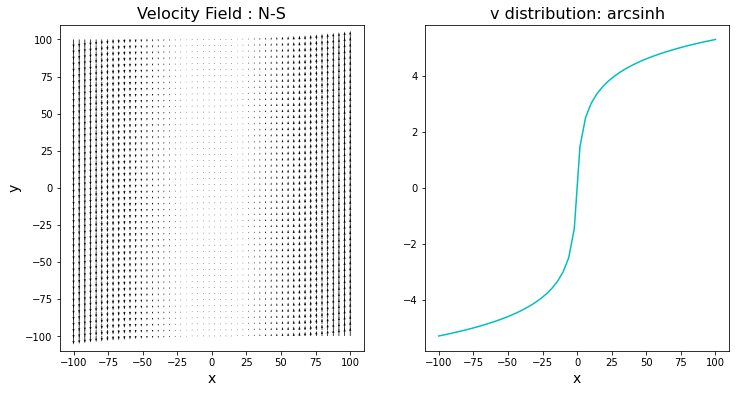

In [128]:
# plot the velocity field 
fig2, ((a1), (a2)) = plt.subplots(1, 2, figsize = (12, 6))

a1.quiver(X, Y, u, v)
a1.set_title( 'Velocity Field : N-S', fontsize= 16 )
a1.set_xlabel('x', fontsize = 14)
a1.set_ylabel('y', fontsize = 14)

a2.plot(x, numpy.arcsinh(x), 'c')
a2.set_xlabel('x', fontsize = 14)
a2.set_title( 'v distribution: arcsinh', fontsize= 16 )
plt.show()


**Step 2** : Calculate spatial derivatives

In [129]:
# u_x , u_y, v_y = 0

# derivative of inverse sinh
actual_v_x = 1 / numpy.sqrt(X**2 + 1)

#calculate central difference
v_x = numpy.empty((y.shape[0], x.shape[0]))

for i in range(0, x.shape[0]): 
    
    if i != 0 and i != x.shape[0]-1 :
            
            v_x[:, i] = ( v[:, i+1] - v[:, i-1] ) / ( x[i+1]- x[i-1] )
    else:
        v_x[:, i] = 0

In [131]:
actual_v_x

array([[0.0099995 , 0.01042497, 0.01088824, ..., 0.01088824, 0.01042497,
        0.0099995 ],
       [0.0099995 , 0.01042497, 0.01088824, ..., 0.01088824, 0.01042497,
        0.0099995 ],
       [0.0099995 , 0.01042497, 0.01088824, ..., 0.01088824, 0.01042497,
        0.0099995 ],
       ...,
       [0.0099995 , 0.01042497, 0.01088824, ..., 0.01088824, 0.01042497,
        0.0099995 ],
       [0.0099995 , 0.01042497, 0.01088824, ..., 0.01088824, 0.01042497,
        0.0099995 ],
       [0.0099995 , 0.01042497, 0.01088824, ..., 0.01088824, 0.01042497,
        0.0099995 ]])

**Step 3** : Calculate lateral strain rate at each point

In [125]:
# alpha = sqrt( (u_x - v_y)**2 + (v_x + u_y)**2 )
alpha = v_x
true_alpha = actual_v_x

**Step 4** : Plot the result

<ipython-input-126-f7331e721084>:11: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig3.colorbar(im1, shrink = 0.8)


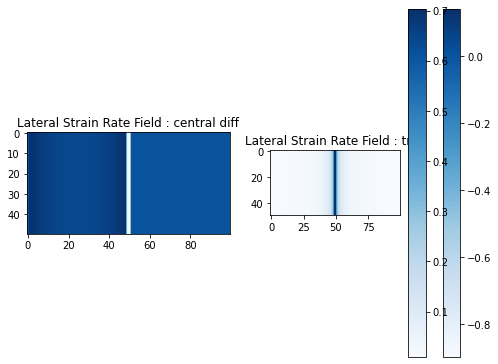

In [126]:
# plot the lateral strain rate within field 
fig3, axes = plt.subplots(1, 2, figsize = (8, 8))

im1 = axes[0].imshow(alpha, cmap= 'Blues')
im2 = axes[1].imshow(true_alpha, cmap = 'Blues')

axes[0].set_title( 'Lateral Strain Rate Field : central diff' )
axes[1].set_title( 'Lateral Strain Rate Field : true' )


fig3.colorbar(im1, shrink = 0.8)
fig3.colorbar(im2, shrink = 0.8)

plt.show()

# Visualizing Strain Rate

$ \begin{align}
        \text{strain rate } = \frac{ \partial \epsilon}{ \partial t} = \frac{1}{L} \frac{\partial (L - L_0)}{\partial t} 
        \\
        \\
        \text{versus}
        \\
        \\
        \alpha = \sqrt{ (u_x - v_y)^2 + (v_x + u_y)^2 }
   \end{align}
$

units

picture

**Simulation 1**: 
u_x = 1 unit per sec

In [7]:
from matplotlib.animation import FuncAnimation

Scatter plot

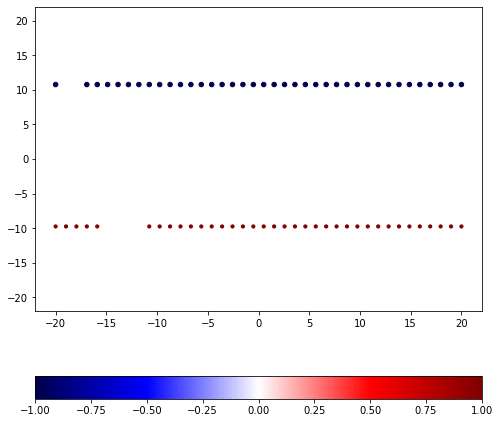

In [56]:
# create figure
fig4, axis = plt.subplots( figsize = (8, 8))

# location of pts
x = numpy.linspace( -20, 20, 40)
y = numpy.linspace( -20, 20, 40)

X, Y = numpy.meshgrid(x, y)

#create a mask
good = numpy.ones([40, 40]) == 1
good[10, 5:9] = False
good[30, 1:3] = False
bad = numpy.invert(good)

# which pts show up with colors
pts = numpy.ma.masked_array( numpy.zeros([40, 40]), mask = False) 
pts[10] = 1
pts[30] = -1
pts.mask = bad

# size of pts
size = numpy.zeros([40, 40])
size[10] = 10
size[30] = 20

img4 = plt.scatter(X, Y, c = pts, s = size, cmap = 'seismic')
cb = plt.colorbar(img4, orientation='horizontal') #, pad=0.)

plt.show()

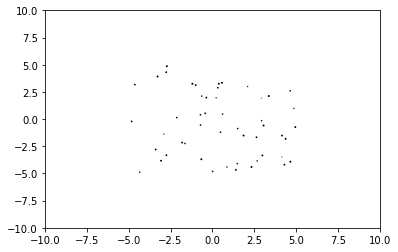

In [15]:
import matplotlib.animation as animation

class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    def __init__(self, numpoints=50):
        self.numpoints = numpoints
        self.stream = self.data_stream()

        # Setup the figure and axes...
        self.fig, self.ax = plt.subplots()
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5, 
                                          init_func=self.setup_plot, blit=True)

    def setup_plot(self):
        """Initial drawing of the scatter plot."""
        x, y, s, c = next(self.stream).T
        self.scat = self.ax.scatter(x, y, c=c, s=s, vmin=0, vmax=1,
                                    cmap="jet", edgecolor="k")
        self.ax.axis([-10, 10, -10, 10])
        # For FuncAnimation's sake, we need to return the artist we'll be using
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,

    def data_stream(self):
        """Generate a random walk (brownian motion). Data is scaled to produce
        a soft "flickering" effect."""
        xy = (numpy.random.random((self.numpoints, 2))-0.5)*10
        s, c = numpy.random.random((self.numpoints, 2)).T
        while True:
            xy += 0.03 * (numpy.random.random((self.numpoints, 2)) - 0.5)
            s += 0.05 * (numpy.random.random(self.numpoints) - 0.5)
            c += 0.02 * (numpy.random.random(self.numpoints) - 0.5)
            yield numpy.c_[xy[:,0], xy[:,1], s, c]

    def update(self, i):
        """Update the scatter plot."""
        data = next(self.stream)

        # Set x and y data...
        self.scat.set_offsets(data[:, :2])
        # Set sizes...
        self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        self.scat.set_array(data[:, 3])

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.
        return self.scat,


if __name__ == '__main__':
    a = AnimatedScatter()
    plt.show()